# Problem Statement


This database contains attributes related to car price. Our aim is to use linear regresssion and develop a model which explains the relationship between independent and dependent variables. 

### Methodology

Linear regresion model development is divided into multiple stpes as mentioned below,
1. Data exploring and understanding: This step involves preliminary level data understanding and exploring.

2. Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis. 

3. Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.

4. Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type. 

5. Train-test split: This step involves spliting the dataset into train and test parts.

6. Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating hte model using relevant matrics.
    - Model development using all the feature columns.
    - RFE and model development.
    - Manual feature elimination using VIF and model development.
    - Model using Ridge regularizaton. 
    - Model using Lasso regularizaton. 
    - Residual Analysis

7. Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Importing Dependancies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading Dataset

In [2]:
data = pd.read_csv('CarPrice.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


It can be observed that,
- dataset is having 26 columns, which includes 1 target column that is 'price'.
- dataset has 205 entries


In [3]:
# Getting insights into dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

As per above, 
- data is having 16 numeric columns and 10 object columns.
- dataset isn't having any missing values. 

## 1. Data exploring and understanding

In [4]:
# symboling:assigned insurance risk rating (+3: risky, -3:pretty safe)

data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Insuracne risk rating are reasonably uniform in nature. We need to convert this column to 'object' type

In [5]:
# Changing dtype for 'symboling' column

data.symboling = data.symboling.astype('object')

In [6]:
# CarName: Car model name (cmanufacturer + model)

print(data.CarName.value_counts())

print(' ')

print('No. of unique car models:', data.CarName.nunique())

toyota corona               6
peugeot 504                 6
toyota corolla              6
subaru dl                   4
mitsubishi mirage g4        3
                           ..
renault 5 gtl               1
bmw x5                      1
isuzu MU-X                  1
subaru brz                  1
buick century luxus (sw)    1
Name: CarName, Length: 147, dtype: int64
 
No. of unique car models: 147


Observations,
- There are 147 different car models and many of them have single entries.
- We may require to extract car brand name (manufacturer) to make this feature column useful in our model building.

In [7]:
# fueltype: fuel type used in the car

data.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

The distrubution is little skewed, ~90% data belongs to one category (i.e. 'gas). But we can still extract some meaningful insights from this.

In [8]:
# aspiration: Aspiration used in the car

data.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [9]:
# doornumber: Number of doors in the car

data.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [10]:
# carbody: body type of the car

data.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [11]:
# drivewheel: power wheels arrangement

data.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

 It can be observed that '4wd' category is having only 9 entries. But still we may get some meaningful insight from this feature column.

In [12]:
# enginelocation: location of the engine in the car

data.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

This column is highly skewed hence we are going to drop this one.

In [13]:
# Dropping 'enginelocation' column

data = data.drop('enginelocation', axis=1)

<AxesSubplot:xlabel='wheelbase'>

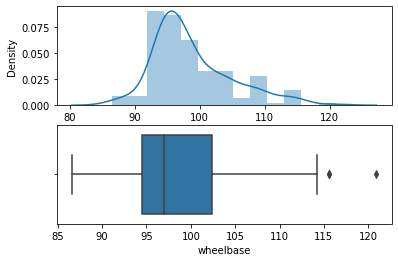

In [14]:
# wheelbase: wheelbase of the car

plt.subplot(2,1,1)
sns.distplot(data.wheelbase)

plt.subplot(2,1,2)
sns.boxplot(data.wheelbase)

Observations,
- wheelbase size is distributed between 80 to 120 units.
- Median value is near 96 units.

<AxesSubplot:xlabel='carlength'>

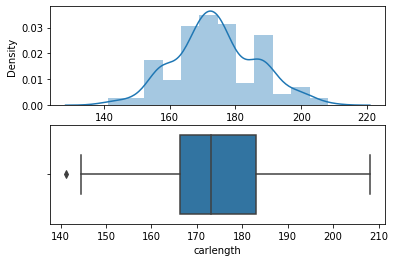

In [15]:
# Car length

plt.subplot(2,1,1)
sns.distplot(data.carlength)

plt.subplot(2,1,2)
sns.boxplot(data.carlength)

Observations,
- Car length is distributed between 140 to 210 units.
- Median value is near 172 units.

<AxesSubplot:xlabel='carwidth'>

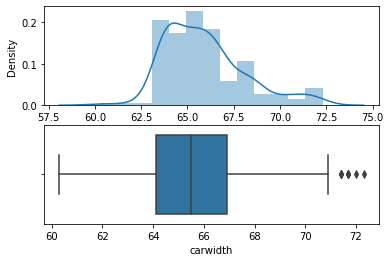

In [16]:
# Car width

plt.subplot(2,1,1)
sns.distplot(data.carwidth)

plt.subplot(2,1,2)
sns.boxplot(data.carwidth)

Observations,
- Car width is distributed between 57.5 to 75 units.
- Median value is near 65.5 units.

<AxesSubplot:xlabel='carheight'>

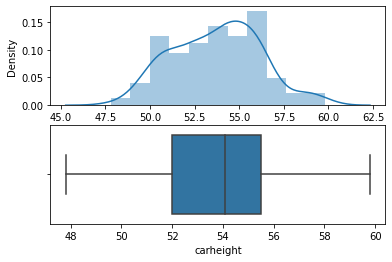

In [17]:
# Car height

plt.subplot(2,1,1)
sns.distplot(data.carheight)

plt.subplot(2,1,2)
sns.boxplot(data.carheight)

Observations,
- Car height is distributed between 45 to 62 units.
- Median value is near 54 units.

<AxesSubplot:xlabel='curbweight'>

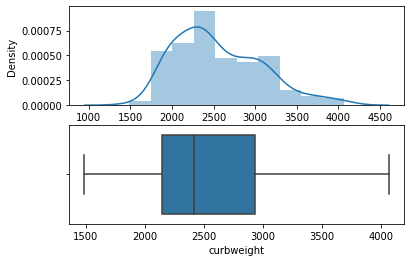

In [18]:
# Car curbweight

plt.subplot(2,1,1)
sns.distplot(data.curbweight)

plt.subplot(2,1,2)
sns.boxplot(data.curbweight)

Observations,
- Car weight is distributed between 1000 to 4500 units.
- Median value is near 2400 units.

In [19]:
# enginetype: car engine type

data.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

This feature column is slightly skewed but can be utilised for getting some meaningful insights. One more option is to delete lower frequency entries.

In [20]:
# cylindertype: number of cylinders in engine

data.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

This feature column is slightly skewed but can be utilised for getting some meaningful insights. One more option is to delete lower frequency entries.

<AxesSubplot:xlabel='enginesize'>

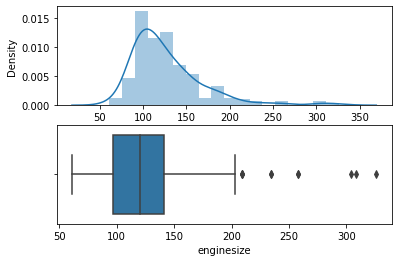

In [21]:
# Engine size

plt.subplot(2,1,1)
sns.distplot(data.enginesize)

plt.subplot(2,1,2)
sns.boxplot(data.enginesize)

Observations,
- Engine size is distributed between 50 to 350 units.
- Median value is near 125 units.

In [22]:
# fuelsystem: kind of fuel system in car

data.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

<AxesSubplot:xlabel='boreratio'>

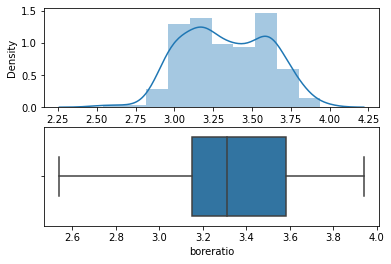

In [23]:
# boreratio

plt.subplot(2,1,1)
sns.distplot(data.boreratio)

plt.subplot(2,1,2)
sns.boxplot(data.boreratio)

Observations,
- Engine Bore ratio is distributed between 2.25 to 4.25 units.
- Median value is near 3.3 units.

<AxesSubplot:xlabel='stroke'>

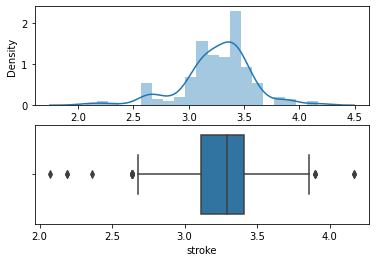

In [24]:
# stroke: Engien stroke size

plt.subplot(2,1,1)
sns.distplot(data.stroke)

plt.subplot(2,1,2)
sns.boxplot(data.stroke)

Observations,
- Engine stoke length is distributed between 2 to 4.5 units.
- Median value is near 3.3 units.

<AxesSubplot:xlabel='compressionratio'>

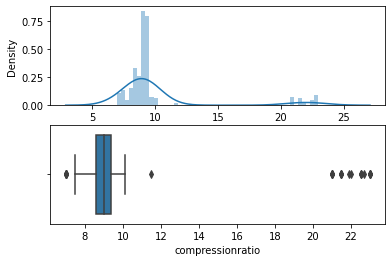

In [25]:
# Compressionratio: Engine compression ratio

plt.subplot(2,1,1)
sns.distplot(data.compressionratio)

plt.subplot(2,1,2)
sns.boxplot(data.compressionratio)

Observation,
- outliers are present in this column. That is becasue gas and diesel engine have different range of compression ratio.

<AxesSubplot:xlabel='horsepower'>

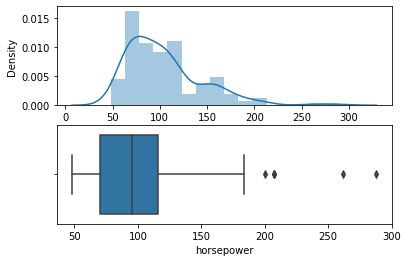

In [26]:
# horsepower: engien power

plt.subplot(2,1,1)
sns.distplot(data.horsepower)

plt.subplot(2,1,2)
sns.boxplot(data.horsepower)

Observations,
- Engine power is distributed between 50 to 300 units.
- Median value is near 95 units.

<AxesSubplot:xlabel='peakrpm'>

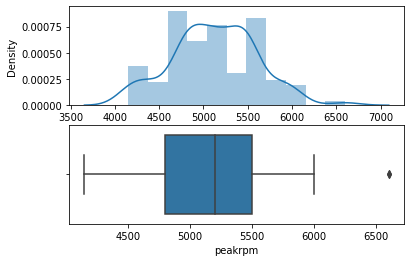

In [27]:
# peakrpm: peak rpm of the engine

plt.subplot(2,1,1)
sns.distplot(data.peakrpm)

plt.subplot(2,1,2)
sns.boxplot(data.peakrpm)

Observations,
- Engine peak rpm is distributed between 3500 to 7000 units.
- Median value is near 5250 units.

<AxesSubplot:xlabel='citympg'>

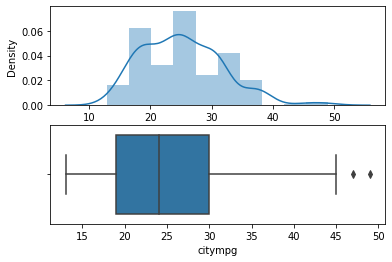

In [28]:
# citympg: mileage of car in city

plt.subplot(2,1,1)
sns.distplot(data.citympg)

plt.subplot(2,1,2)
sns.boxplot(data.citympg)

Observations,
- Car mileage is distributed between 10 to 50 mpg.
- Median value is near 24 mpg.

<AxesSubplot:xlabel='highwaympg'>

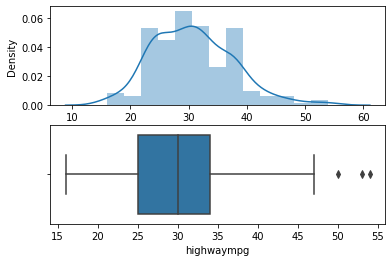

In [29]:
# highwaympg: mileage of car in city

plt.subplot(2,1,1)
sns.distplot(data.highwaympg)

plt.subplot(2,1,2)
sns.boxplot(data.highwaympg)

Observations,
- Car mileage (highway) is distributed between 10 to 60 mpg.
- Median value is near 30 mpg.

## 2. Data Cleaning

In [30]:
# droppping 'CarID' column: It is a unique reference number to each car

data = data.drop('car_ID', axis=1)

## 3. Data Visualization

<AxesSubplot:>

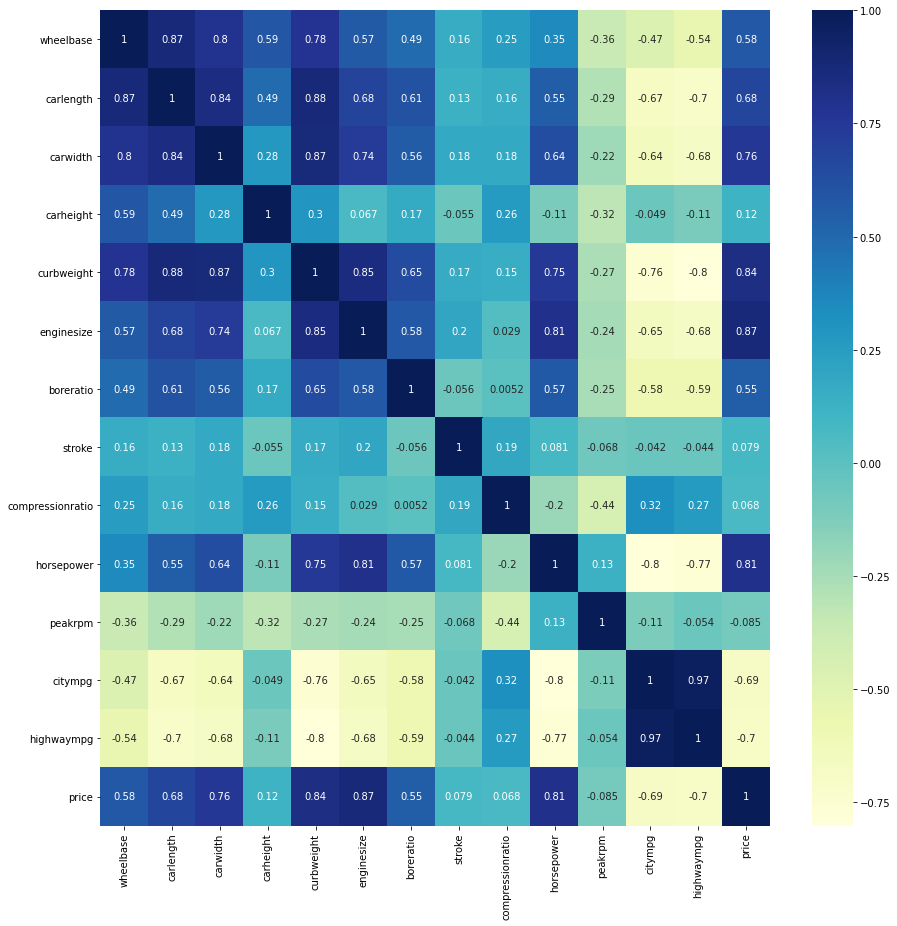

In [31]:
# Pearson's correlation: numeric data columns

# numeric columns
num_cols = data.select_dtypes(include=('int64', 'float64')).columns

# heatmap
plt.subplots(figsize=(15,15))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='YlGnBu')


Observation,
1. Carlength and wheelbase are having high correlaton of 0.87. Here, we would be dropping wheelbase.
2. Carlength and curbweight are having high correlaton of 0.88. Here, we would be dropping curbweight.
3. Carwidth and curbweight are having high correlaton of 0.87. Here, we would be dropping curbweight.
4. highwaympg and citympg are having high correlaton of 0.97. Here, we would be dropping citympg.


Here, we would be dropping the feature when it is having absolute value of Pearson's correlation more that 0.85. The selection of dropped variable is based on domain knowledge or the feature which is non-standard or tough to obtain.

In [32]:
# Dropping featues

data = data.drop(['wheelbase', 'curbweight', 'citympg'], axis=1)

In [33]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,168.8,64.1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,168.8,64.1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,171.2,65.5,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,176.6,66.2,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,176.6,66.4,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0


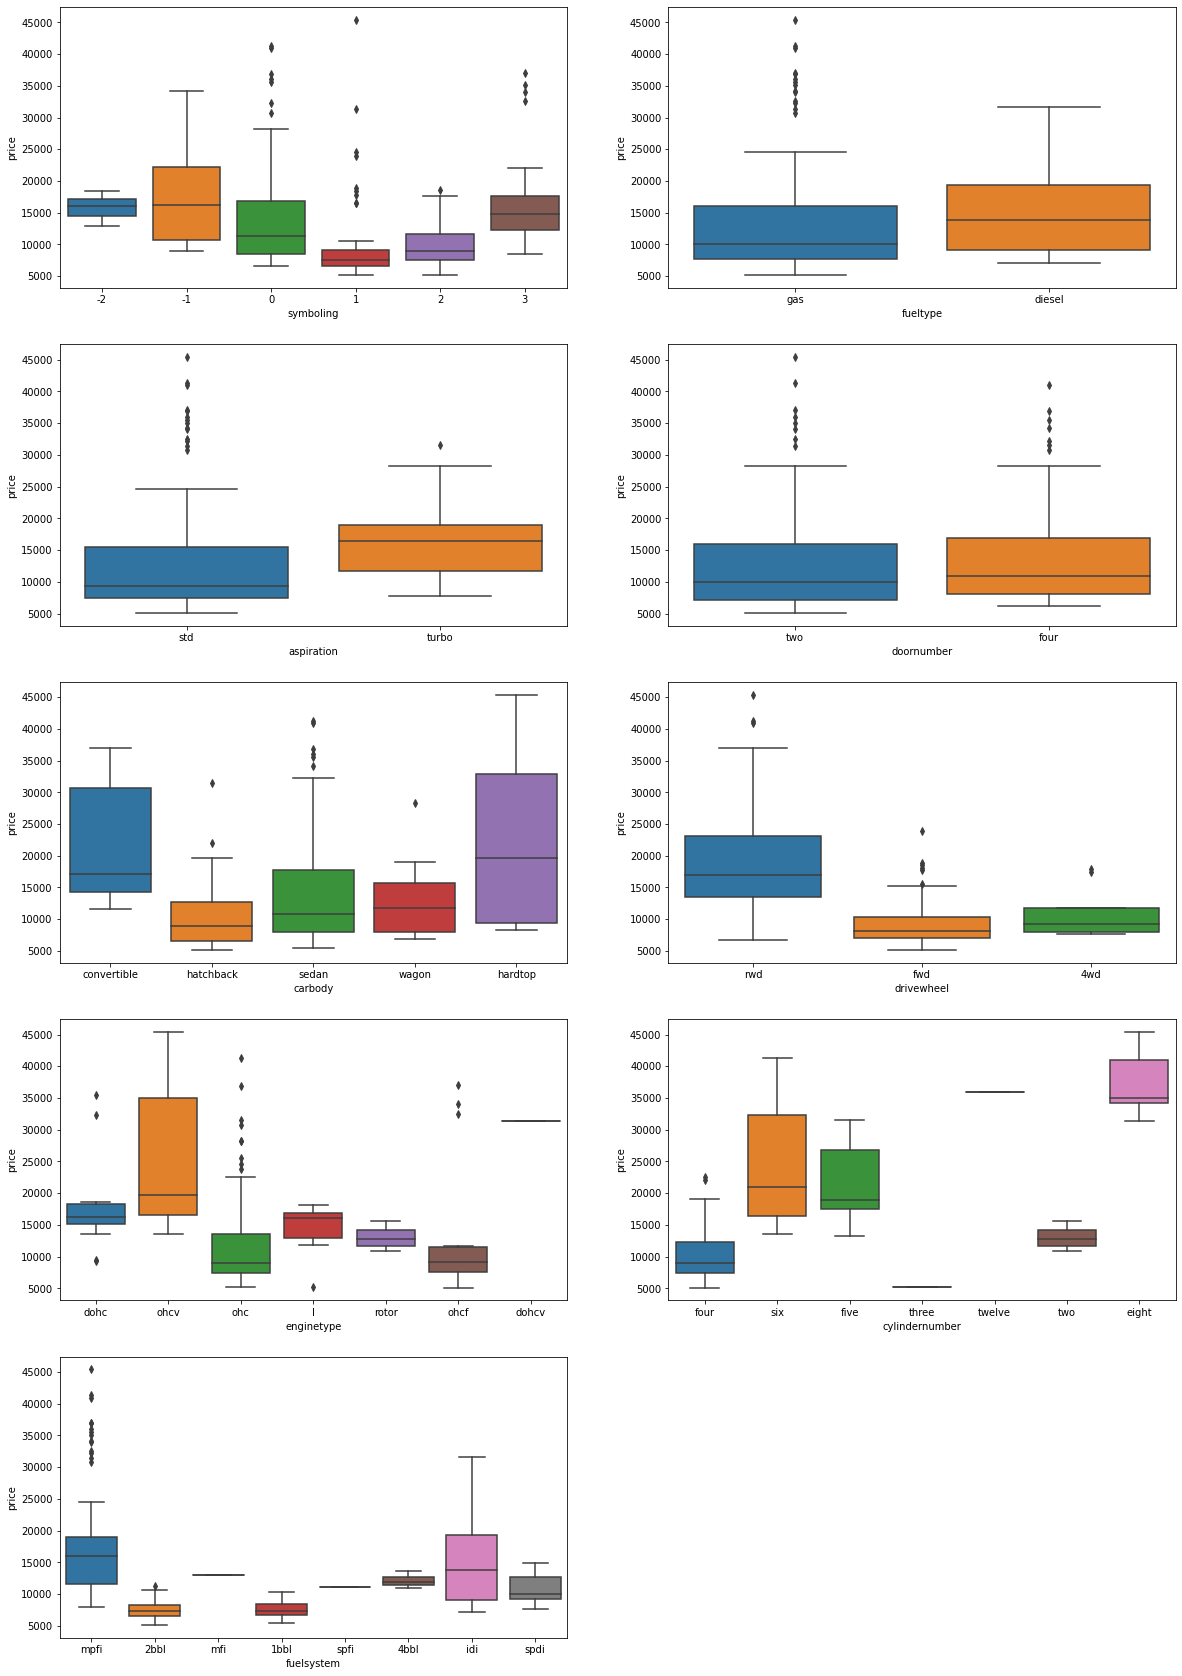

In [34]:
# boxplot: categorical columns Vs dependent variable (price)

cat_cols = data.select_dtypes(include = 'object').columns

# removing 'CarName' column with high number of categories
cat_cols = cat_cols.drop('CarName')

plt.subplots(figsize=(20,30))
i = 1

for col in cat_cols:
    plt.subplot(int(len(cat_cols)/2)+1, 2 , i)
    sns.boxplot(x=col, y='price', data=data)
    i = i + 1
    
    

Observations,
- Cars with insurance rating 1 are the cheapest.
- Diesel, turbo based cars are expensive.
- rwd cars are expensive as compared to fwd and 4wd.
- Convertibles and hardtop are expensive car segments.
- 8 cylinder cars are most expensive. Probably super cars

## 4. Data Preparation

In [35]:
# brand: Extracting car brand name from 'CarName' column

data['brand'] = data.CarName.str.split(' ', expand=True)[0]

In [36]:
# Analysing quality of brand column

data.brand.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
maxda           2
vw              2
renault         2
mercury         1
porcshce        1
Nissan          1
vokswagen       1
toyouta         1
Name: brand, dtype: int64

Observation,
- 'maxda' is an error. Should be replaced with 'mazda'.
- 'vw' and 'vokswagen' should be replaced with 'volkswagen'.
- 'porcshce' should be replaced with 'porsche'.
- 'Nissan' to be replaced with 'nissan'.
- 'toyouta' to be replaced with 'toyota'

In [37]:
# replacing faulty entries

data.brand = data.brand.replace('maxda', 'mazda')
data.brand = data.brand.replace(['vw', 'vokswagen'], 'mazda')
data.brand = data.brand.replace('porcshce', 'porsche')
data.brand = data.brand.replace('Nissan', 'nissan')
data.brand = data.brand.replace('toyouta', 'toyota')

# rechecking
data.brand.value_counts()

toyota         32
mazda          20
nissan         18
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: brand, dtype: int64

In [38]:
# Dropping 'CarName' column

data = data.drop('CarName', axis=1)

In [39]:
# Dummies

cat_cols = data.select_dtypes(include='object').columns

dummies = pd.get_dummies(data[cat_cols], drop_first=True)

In [40]:
# data1 = Combining dimmies with numeric columns

# num_cols
num_cols = data.select_dtypes(include=('int64', 'float64')).columns

data1 = pd.concat([data[num_cols], dummies], axis=1)

In [41]:
# Final dataset

data1.head()

,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,...,0,0,0,0,0,0,0,0,0,0
1,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,...,0,0,0,0,0,0,0,0,0,0
2,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,26,...,0,0,0,0,0,0,0,0,0,0
3,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,30,...,0,0,0,0,0,0,0,0,0,0
4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,22,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# splitting into X and y

X = data1.drop('price', axis=1)
y = data1['price']

## 5. Train-Test split

In [43]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [44]:
print('Train X data shape:', X_train.shape)
print('Test X data shape:', X_test.shape)
print('Train y data shape:', y_train.shape)
print('Test y data shape:', y_test.shape)

Train X data shape: (143, 64)
Test X data shape: (62, 64)
Train y data shape: (143,)
Test y data shape: (62,)


#### Rescaling the dataset

In [45]:
# instantiating the scalers

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [46]:
# Minmax scaling

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), index=X_test.index, columns=X_test.columns)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

## 6. Model Development - Validation and Evaluation

In [47]:
# Initial level Linear regression model using all the features

lm1 = LinearRegression()  # instantiating Linear Regression model
lm1.fit(X_train, y_train)


# Prediction using model
y_pred_train1 = lm1.predict(X_train)
y_pred_test1 = lm1.predict(X_test)

In [48]:
# Evaluation matrices

metric = []
r2_train_lr = r2_score(y_train, y_pred_train1)
metric.append(['r2_train:',r2_train_lr])

r2_test_lr = r2_score(y_test, y_pred_test1)
metric.append(['r2_test:',r2_test_lr])

rss_train_lr = np.sum(np.square(y_train - y_pred_train1))
metric.append(['rss_train:',rss_train_lr])

rss_test_lr = np.sum(np.square(y_test - y_pred_test1))
metric.append(['rss_test:',rss_test_lr])

mse_train_lr = mean_squared_error(y_train, y_pred_train1)
metric.append(['rmse_train:', mse_train_lr**0.5])

mse_test_lr = mean_squared_error(y_test, y_pred_test1)
metric.append(['rmse_test:', mse_test_lr**0.5])


metric

[['r2_train:', 0.9731408484969457],
 ['r2_test:', 0.796074591361536],
 ['rss_train:', 0.1774221917934684],
 ['rss_test:', 0.6757660947088983],
 ['rmse_train:', 0.03522377929646892],
 ['rmse_test:', 0.10440044607407624]]

Observations,
- training r2 score is 0.97 and test r2 score is 0.80. That means this is the case of 'overfitting'.
- We need to reduce the number of features and try developing the model again.
- We would be using RFE, an aggressive feature elimination technique.

In [49]:
# Running Recursive Feaetue elimination (RFE) with the output number of the variable equal to 30

lm2 = LinearRegression()  # instantiating Linear Regression model
lm2.fit(X_train, y_train)

rfe = RFE(lm2, 30)             # instantiating RFE 
rfe = rfe.fit(X_train, y_train)

In [50]:
# Features supported by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('carlength', False, 32),
 ('carwidth', True, 1),
 ('carheight', False, 2),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 9),
 ('horsepower', False, 14),
 ('peakrpm', True, 1),
 ('highwaympg', False, 28),
 ('symboling_-1', False, 8),
 ('symboling_0', False, 11),
 ('symboling_1', False, 12),
 ('symboling_2', False, 10),
 ('symboling_3', False, 24),
 ('fueltype_gas', False, 7),
 ('aspiration_turbo', True, 1),
 ('doornumber_two', False, 26),
 ('carbody_hardtop', False, 4),
 ('carbody_hatchback', False, 3),
 ('carbody_sedan', False, 5),
 ('carbody_wagon', False, 6),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 23),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 22),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_th

In [51]:
# Updating the dataset using RFE

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [52]:
# Building linear model using RFE filtered features

# Instantiate
lm3 = LinearRegression()

# Fit a line
lm3.fit(X_train_rfe, y_train)

# Prediction using model
y_pred_train3 = lm3.predict(X_train_rfe)
y_pred_test3 = lm3.predict(X_test_rfe)

In [53]:
# Evaluation matrices

metric = []
r2_train_lr = r2_score(y_train, y_pred_train3)
metric.append(['r2_train:',r2_train_lr])

r2_test_lr = r2_score(y_test, y_pred_test3)
metric.append(['r2_test:',r2_test_lr])

rss_train_lr = np.sum(np.square(y_train - y_pred_train3))
metric.append(['rss_train:',rss_train_lr])

rss_test_lr = np.sum(np.square(y_test - y_pred_test3))
metric.append(['rss_test:',rss_test_lr])

mse_train_lr = mean_squared_error(y_train, y_pred_train3)
metric.append(['rmse_train:', mse_train_lr**0.5])

mse_test_lr = mean_squared_error(y_test, y_pred_test3)
metric.append(['rmse_test:', mse_test_lr**0.5])


metric

[['r2_train:', 0.9621423568090136],
 ['r2_test:', 0.7829200517017292],
 ['rss_train:', 0.2500743938361598],
 ['rss_test:', 0.7193574840946168],
 ['rmse_train:', 0.04181832116271827],
 ['rmse_test:', 0.10771508745780327]]

Observation,
- We are still facing the problem of overfitting.
- We would be using regularization techniques Ridge and Lasso and tune their hyper parameters using grid search.

#### Checking Variance inflantion factor (VIF) 

In [54]:
# creating vif function

def get_VIF_table(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [55]:
# Checking VIF

get_VIF_table(X_train_rfe)

,Features,VIF
16,cylindernumber_two,inf
24,brand_peugeot,inf
7,enginetype_l,inf
10,enginetype_rotor,inf
14,cylindernumber_three,inf
1,enginesize,127.49
2,boreratio,90.33
3,stroke,58.17
12,cylindernumber_four,54.18
0,carwidth,53.67


Few features have very high VIF (i.e. infinite), that is becasue of they aren't linearly independet of that other feature.Hecne we are going to drop features one by one.

In [56]:
# Dropping 'cylindernumber_two' from both the train and test data

X_train_rfe = X_train_rfe.drop('cylindernumber_two', axis=1)
X_test_rfe = X_test_rfe.drop('cylindernumber_two', axis=1)

In [57]:
# Checking VIF

get_VIF_table(X_train_rfe)

,Features,VIF
14,cylindernumber_three,inf
7,enginetype_l,inf
23,brand_peugeot,inf
1,enginesize,127.49
2,boreratio,90.33
3,stroke,58.17
12,cylindernumber_four,54.18
0,carwidth,53.67
26,brand_subaru,33.47
8,enginetype_ohcf,28.92


In [58]:
# Dropping 'cylindernumber_three' from both the train and test data

X_train_rfe = X_train_rfe.drop('cylindernumber_three', axis=1)
X_test_rfe = X_test_rfe.drop('cylindernumber_three', axis=1)

In [59]:
# Checking VIF

get_VIF_table(X_train_rfe)

,Features,VIF
1,enginesize,127.49
2,boreratio,90.33
3,stroke,58.17
12,cylindernumber_four,54.18
0,carwidth,53.67
25,brand_subaru,33.47
8,enginetype_ohcf,28.92
22,brand_peugeot,16.64
13,cylindernumber_six,15.87
7,enginetype_l,13.43


In [60]:
# Dropping 'enginesize' from both the train and test data

X_train_rfe = X_train_rfe.drop('enginesize', axis=1)
X_test_rfe = X_test_rfe.drop('enginesize', axis=1)

In [61]:
# Checking VIF

get_VIF_table(X_train_rfe)

,Features,VIF
0,carwidth,50.02
11,cylindernumber_four,43.67
2,stroke,42.94
24,brand_subaru,31.27
7,enginetype_ohcf,28.57
1,boreratio,27.29
21,brand_peugeot,15.65
12,cylindernumber_six,12.90
6,enginetype_l,11.40
3,peakrpm,9.85


In [62]:
# Dropping 'carwidth' from both the train and test data

X_train_rfe = X_train_rfe.drop('carwidth', axis=1)
X_test_rfe = X_test_rfe.drop('carwidth', axis=1)

In [63]:
# Checking VIF

get_VIF_table(X_train_rfe)

,Features,VIF
10,cylindernumber_four,43.58
1,stroke,36.15
23,brand_subaru,28.74
6,enginetype_ohcf,26.41
0,boreratio,21.37
20,brand_peugeot,13.30
11,cylindernumber_six,12.04
5,enginetype_l,10.76
2,peakrpm,9.66
9,cylindernumber_five,6.10


In [64]:
# Dropping 'cylindernumber_four' from both the train and test data

X_train_rfe = X_train_rfe.drop('cylindernumber_four', axis=1)
X_test_rfe = X_test_rfe.drop('cylindernumber_four', axis=1)

In [65]:
# Checking VIF

get_VIF_table(X_train_rfe)

,Features,VIF
22,brand_subaru,27.71
6,enginetype_ohcf,26.35
0,boreratio,21.30
1,stroke,16.99
19,brand_peugeot,10.30
5,enginetype_l,9.15
2,peakrpm,6.13
9,cylindernumber_five,5.07
20,brand_porsche,3.95
12,brand_audi,3.76


- Ideal value of VIF in linear regression should be below 5. Here have still got many features with VIF above 5. 

In [66]:
# Building linear model using RFE filtered features

# Instantiate
lm3_1 = LinearRegression()

# Fit a line
lm3_1.fit(X_train_rfe, y_train)

# Prediction using model
y_pred_train3_1 = lm3_1.predict(X_train_rfe)
y_pred_test3_1 = lm3_1.predict(X_test_rfe)

In [67]:
# Evaluation matrices

metric = []
r2_train_lr = r2_score(y_train, y_pred_train3_1)
metric.append(['r2_train:',r2_train_lr])

r2_test_lr = r2_score(y_test, y_pred_test3_1)
metric.append(['r2_test:',r2_test_lr])

rss_train_lr = np.sum(np.square(y_train - y_pred_train3_1))
metric.append(['rss_train:',rss_train_lr])

rss_test_lr = np.sum(np.square(y_test - y_pred_test3_1))
metric.append(['rss_test:',rss_test_lr])

mse_train_lr = mean_squared_error(y_train, y_pred_train3_1)
metric.append(['rmse_train:', mse_train_lr**0.5])

mse_test_lr = mean_squared_error(y_test, y_pred_test3_1)
metric.append(['rmse_test:', mse_test_lr**0.5])


metric

[['r2_train:', 0.8845345668065672],
 ['r2_test:', 0.83999152997789],
 ['rss_train:', 0.7627244007031128],
 ['rss_test:', 0.5302345579647018],
 ['rmse_train:', 0.07303243846301406],
 ['rmse_test:', 0.09247794488283817]]

Observation,


- We are still facing overfitting. Hence, we would move towards regularization.
- Regularization is the sophisticated way of reducing overfitting.

#### Ridge regression and grid search

In [68]:
# parameters grid
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    


model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
# Best hyper parameter value
print(model_cv.best_params_)

{'alpha': 0.9}


In [70]:
# building model using best value for hyper parameter

alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)   # printing the coefficients

[[ 0.36857873  0.04004911 -0.00244263  0.05443076  0.1035364  -0.02779922
  -0.01715624  0.0759983   0.05029334  0.04196992  0.2325943   0.28142398
   0.13431095  0.15982786  0.31420599 -0.03304184 -0.03335022 -0.08361173
  -0.11123789  0.01089193  0.16357539  0.01191415 -0.14690262 -0.0656359
   0.00269422]]


Observation,
- Values for the coefficients are near to 0, which is highly desirable in linear regression model. It signifies the  better fitting.

In [71]:
# Prediction using model

y_pred_train4 = ridge.predict(X_train_rfe)
y_pred_test4 = ridge.predict(X_test_rfe)

In [72]:
# Evaluation matrices

metric = []
r2_train_lr = r2_score(y_train, y_pred_train4)
metric.append(['r2_train:',r2_train_lr])

r2_test_lr = r2_score(y_test, y_pred_test4)
metric.append(['r2_test:',r2_test_lr])

rss_train_lr = np.sum(np.square(y_train - y_pred_train4))
metric.append(['rss_train:',rss_train_lr])

rss_test_lr = np.sum(np.square(y_test - y_pred_test4))
metric.append(['rss_test:',rss_test_lr])

mse_train_lr = mean_squared_error(y_train, y_pred_train4)
metric.append(['rmse_train:', mse_train_lr**0.5])

mse_test_lr = mean_squared_error(y_test, y_pred_test4)
metric.append(['rmse_test:', mse_test_lr**0.5])


metric

[['r2_train:', 0.8528759190191071],
 ['r2_test:', 0.8124914665118814],
 ['rss_train:', 0.9718503918584878],
 ['rss_test:', 0.6213640087611842],
 ['rmse_train:', 0.08243880510065021],
 ['rmse_test:', 0.10010994027222983]]

Observation,
- r2 score for training is ~0.85 but for test it is ~0.81. This indicates that model is performing good but little oberfitting.
- Next, we would try lasso regularisation. This technique can help making coefficinet values to 0 which is equivalent to dropping those features completely.

#### Lasso regression and grid search

In [73]:
# parameters grid
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    


model_cv.fit(X_train_rfe, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
# Best hyper parameter value
print(model_cv.best_params_)

{'alpha': 0.001}


In [75]:
# building model using best value for hyper parameter

alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
print(lasso.coef_)   # printing the coefficients

[ 0.41557912  0.          0.01357677  0.04396094  0.05185615 -0.
 -0.          0.          0.          0.          0.26966287  0.45912894
  0.19109644  0.13348562  0.4123829  -0.         -0.00077177 -0.0547878
 -0.08336801 -0.          0.14409817  0.         -0.17443171 -0.05541516
  0.        ]


Observation,
- Can see some paramaters have their value is suppressed to 0.

In [76]:
# Prediction using model

y_pred_train5 = lasso.predict(X_train_rfe)
y_pred_test5 = lasso.predict(X_test_rfe)

In [77]:
# Evaluation matrices

metric = []
r2_train_lr = r2_score(y_train, y_pred_train5)
metric.append(['r2_train:',r2_train_lr])

r2_test_lr = r2_score(y_test, y_pred_test5)
metric.append(['r2_test:',r2_test_lr])

rss_train_lr = np.sum(np.square(y_train - y_pred_train5))
metric.append(['rss_train:',rss_train_lr])

rss_test_lr = np.sum(np.square(y_test - y_pred_test5))
metric.append(['rss_test:',rss_test_lr])

mse_train_lr = mean_squared_error(y_train, y_pred_train5)
metric.append(['rmse_train:', mse_train_lr**0.5])

mse_test_lr = mean_squared_error(y_test, y_pred_test5)
metric.append(['rmse_test:', mse_test_lr**0.5])


metric

[['r2_train:', 0.8659636330934841],
 ['r2_test:', 0.8313634323573756],
 ['rss_train:', 1660.210249740087],
 ['rss_test:', 350.41825147666356],
 ['rmse_train:', 0.07868666350905813],
 ['rmse_test:', 0.09493854263684466]]

Observation,
- r2 score for training is ~0.86 but for test it is ~0.83. Model is performing good.

#### Checking VIF for lasso model

In [78]:
# beta table (coefficients of linear regression)

betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns


betas['Linear'] = lm3_1.coef_.reshape(X_train_rfe.shape[1],-1)
betas['Ridge'] = ridge.coef_.reshape(X_train_rfe.shape[1],-1)
betas['Lasso'] = lasso.coef_.reshape(X_train_rfe.shape[1],-1)

betas

,Linear,Ridge,Lasso
boreratio,0.415435,0.368579,0.415579
stroke,0.051997,0.040049,0.000000
peakrpm,0.031892,-0.002443,0.013577
aspiration_turbo,0.054645,0.054431,0.043961
enginetype_dohcv,0.255952,0.103536,0.051856
enginetype_l,-0.037715,-0.027799,-0.000000
enginetype_ohcf,0.115637,-0.017156,-0.000000
enginetype_ohcv,-0.043811,0.075998,0.000000
enginetype_rotor,0.050235,0.050293,0.000000
cylindernumber_five,-0.136525,0.041970,0.000000


In [79]:
# VIF for lasso regressor model


get_VIF_table(X_train_rfe[X_train_rfe[X_train_rfe.columns[betas.Lasso!=0]].columns])

,Features,VIF
0,boreratio,5.71
1,peakrpm,3.26
12,brand_porsche,1.73
2,aspiration_turbo,1.65
4,cylindernumber_six,1.61
3,enginetype_dohcv,1.52
13,brand_subaru,1.51
7,brand_bmw,1.45
14,brand_toyota,1.33
9,brand_mazda,1.29


Observations,
- Lasso model features have RFE values 5 or below, which is highly desirable in linear regression models.
- Number of features in lasso model is 15. 10 to 15 is considered to be a good range.

#### Optional Check: Checking feature and overall model significance using p and f statistics

In [80]:
# Checking model and features using statsmodels

# lasso_X_cols: non-negative columns in lasso regression
lasso_X_cols = X_train_rfe[X_train_rfe.columns[betas.Lasso!=0]].columns
X_train_lm = sm.add_constant(X_train_rfe[lasso_X_cols])  # adding constant column as per reuqirement of statsmodels

lm = sm.OLS(y_train, X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     59.89
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           4.38e-50
Time:                        13:24:09   Log-Likelihood:                 166.28
No. Observations:                 143   AIC:                            -300.6
Df Residuals:                     127   BIC:                            -253.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

Observations,

- Prob(F-statistics) value is very close to 0, which signifies that model is significant as compared to random guessing.
- All the feature coefficients have p values less than 0.05, which signifies their individual importance in the model. Two fearues coefficients (peakrpm and brand_mazda) have p values more than 0.05. We can accept this as their coefficients have very low values.  

#### Residual Analysis for lasso model

Text(0.5, 0, 'error')

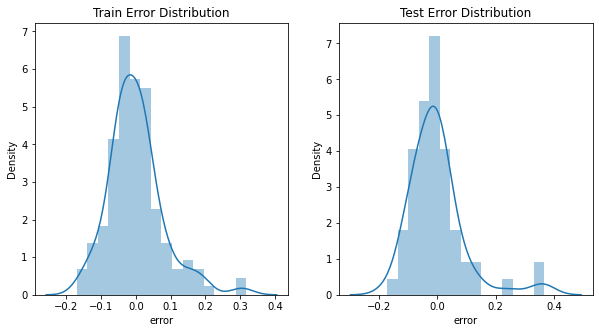

In [81]:
# Error distribution

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train-y_pred_train5.reshape(-1,1))
plt.title('Train Error Distribution')
plt.xlabel('error')

plt.subplot(1,2,2)
sns.distplot(y_test-y_pred_test5.reshape(-1,1))
plt.title('Test Error Distribution')
plt.xlabel('error')

Text(0, 0.5, 'error')

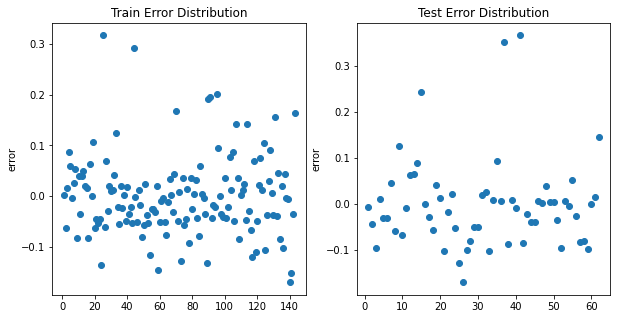

In [82]:
# Plotting error terms in test

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
x1= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x=x1, y=(y_train-y_pred_train5.reshape(-1,1)))
plt.title('Train Error Distribution')
plt.ylabel('error')

plt.subplot(1,2,2)
x2= [i for i in range (1,y_test.shape[0]+1,1)]
plt.scatter(x=x2, y=(y_test-y_pred_test5.reshape(-1,1)))
plt.title('Test Error Distribution')
plt.ylabel('error')

Text(0.5, 1.0, 'Test Actual vs Predicted')

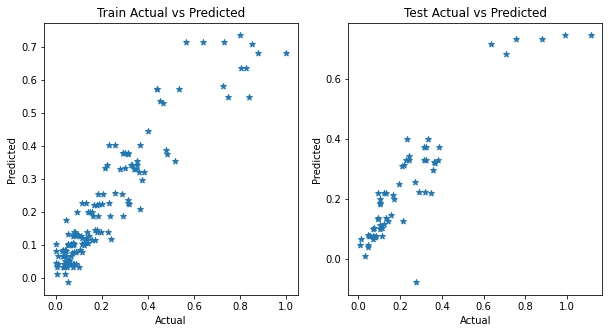

In [83]:
# Plotting y_label Vs y_pred

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train5, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Actual vs Predicted')


plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test5, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Actual vs Predicted')


The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

## 7. Conclusion/Recommendation

In [84]:
# top and bottom 5 features (linear)

print(betas.sort_values('Linear').head(5))
print(betas.sort_values('Linear', ascending=False).head(5))

                       Linear     Ridge     Lasso
brand_subaru        -0.286667 -0.146903 -0.174432
cylindernumber_five -0.136525  0.041970  0.000000
brand_nissan        -0.088143 -0.111238 -0.083368
brand_mitsubishi    -0.084807 -0.083612 -0.054788
brand_toyota        -0.063551 -0.065636 -0.055415
                         Linear     Ridge     Lasso
cylindernumber_twelve  0.659024  0.281424  0.459129
brand_buick            0.533322  0.314206  0.412383
boreratio              0.415435  0.368579  0.415579
brand_audi             0.344445  0.134311  0.191096
cylindernumber_six     0.282408  0.232594  0.269663


In [85]:
# top and bottom 5 features (ridge)

print(betas.sort_values('Ridge').head(5))
print(betas.sort_values('Ridge', ascending=False).head(5))

                    Linear     Ridge     Lasso
brand_subaru     -0.286667 -0.146903 -0.174432
brand_nissan     -0.088143 -0.111238 -0.083368
brand_mitsubishi -0.084807 -0.083612 -0.054788
brand_toyota     -0.063551 -0.065636 -0.055415
brand_mazda      -0.026658 -0.033350 -0.000772
                         Linear     Ridge     Lasso
boreratio              0.415435  0.368579  0.415579
brand_buick            0.533322  0.314206  0.412383
cylindernumber_twelve  0.659024  0.281424  0.459129
cylindernumber_six     0.282408  0.232594  0.269663
brand_porsche          0.081354  0.163575  0.144098


In [86]:
# top and bottom 5 features (lasso)

print(betas.sort_values('Lasso').head(5))
print(betas.sort_values('Lasso', ascending=False).head(5))

                    Linear     Ridge     Lasso
brand_subaru     -0.286667 -0.146903 -0.174432
brand_nissan     -0.088143 -0.111238 -0.083368
brand_toyota     -0.063551 -0.065636 -0.055415
brand_mitsubishi -0.084807 -0.083612 -0.054788
brand_mazda      -0.026658 -0.033350 -0.000772
                         Linear     Ridge     Lasso
cylindernumber_twelve  0.659024  0.281424  0.459129
boreratio              0.415435  0.368579  0.415579
brand_buick            0.533322  0.314206  0.412383
cylindernumber_six     0.282408  0.232594  0.269663
brand_audi             0.344445  0.134311  0.191096


Top 5 features,
- Linear: cylindernumber_twelve, brand_buick, boreratio, brand_audi, brand_subaru
- Ridge: boreratio, brand_buick, cylindernumber_twelve, cylindernumber_six, brand_porsche
- Lasso: cylindernumber_twelve ,boreratio, brand_buick, cylindernumber_six, brand_audi 

### Conclusion:


- Above mentioned features should be considered while defining the car price.
- Final model (lasso regression) is having 15 features, which are easier to find.
- Final model accuracy is 83%.
- We can use the lasso model and predict the car price for any new data as per the required format. While using the new data we would need to transform as per scaler_X and then feed into the model. After that we get y which we need to reverse transform to get the price in actual units.

-------------------